# Telecom Users Dataset 
Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

## What task has to be completed?
The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

- Description of the data (with the calculation of basic statistics);
- Research of dependencies and formulation of hypotheses;
- Building models for predicting the outflow (with justification for the choice of a particular model) based on tested   hypotheses and identified relationships;
- Comparison of the quality of the obtained models.

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --user imblearn
import plotly.express as px
from wordcloud import WordCloud
from IPython.core.display import display, HTML, Javascript

# scaling
from sklearn.preprocessing import StandardScaler

# SMOTE
# from imblearn.over_sampling import SMOTE

# keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# model Evaluation
from sklearn import metrics
 
# model explainablity
import eli5
from eli5.sklearn import PermutationImportance

# plotly offline
from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)

# MISC
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflow'

## Data Cleaning
In this step we check for NaN values, useless attributes in the data, hot encoding, etc

In [25]:
df=pd.read_csv('telecom_users.csv')

In [26]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [27]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5986.0,3533.561310,2035.705666,0.00,1777.25,3546.5,5291.75,7042.00
SeniorCitizen,5986.0,0.161377,0.367909,0.00,0.00,0.0,0.00,1.00
tenure,5986.0,32.468760,24.516391,0.00,9.00,29.0,56.00,72.00
MonthlyCharges,5986.0,64.802213,30.114702,18.25,35.65,70.4,89.90,118.75


In [29]:
df = df.reset_index()
df = df.drop(['index','customerID'],axis=1)

df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [30]:
df.Contract.value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

# EDA 

In [31]:
# stats
df[df['Churn']=='Yes'][['tenure','MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,1587.000000,1587.000000
mean,18.246377,74.164871
std,19.667262,24.965002
min,1.000000,18.850000
25%,2.000000,55.675000
50%,10.000000,79.500000
75%,30.000000,94.400000
max,72.000000,118.350000


In [32]:
# stats 
df[df['Churn']=='No'][['tenure','MonthlyCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,4399.0,37.599682,24.065131,0.00,15.000,37.00,61.0,72.00
MonthlyCharges,4399.0,61.424506,31.086101,18.25,25.125,64.75,88.7,118.75


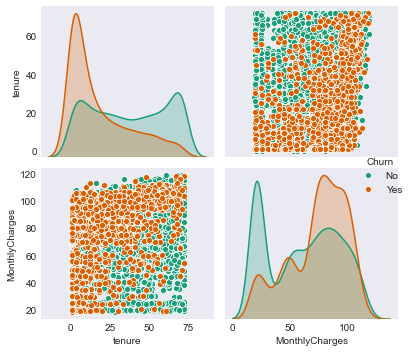

In [33]:
# pairplot
plt.style.use('seaborn-dark')
sns.pairplot(df[['tenure','MonthlyCharges','Churn']],hue='Churn',palette='Dark2');
plt.tight_layout();

In [34]:
# Churn
churn_plot = df['Churn'].value_counts().reset_index()
churn_plot.columns = ['Churn?',"Number_of_customers"]

# plot
px.pie(churn_plot,values ="Number_of_customers",names='Churn?',title='Churn',template='none')

NameError: name 'px' is not defined